# Age

This notebook is to test how well the vcarious resolutions of the model do with respect to model age, particularly looking at the characteristics of AABW.

In [1]:
%matplotlib inline

import pandas as pd
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import IPython.display
import cmocean as cm

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

import sys, os

os.chdir(os.path.join(os.getcwd(), "ACCESS-OM2-updated/figures/age"))
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    #plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

## To deal with memory issues:
* In a terminal on VDI (either over VNC or through SSH and inside screen/tmux), run:
`dask-scheduler`
* This should output the scheduler address, like `tcp://10.6.1.23:8786`. 
* Now, in another terminal (ensuring that the default conda module has cosima_cookbook installed, as all workers will need access to that), run:
`dask-worker tcp://10.6.1.23:8786 --local-directory /local/g40/aek156`
* Then, make sure the following cell matches the scheduler address.

In [3]:
client = Client("tcp://10.6.1.23:8786")
client

<Client: 'tcp://10.6.1.23:8786' processes=1 threads=48, memory=188.56 GiB>

In [4]:
session = cc.database.create_session()

In [5]:
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

darray = cc.querying.getvar(session=session, expt=expt, variable='age_global', chunks={'st_ocean': None}, n=n_files)
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
age_10 = darray.sel(time=slice(pd.Timestamp(2014,1,1),pd.Timestamp(2017,12,31)))\
                        .mean('time').load()

In [6]:
darray = cc.querying.getvar(session=session, expt=expt, variable='kmt', n=-1)
kmt_10 = darray.fillna(1.0).astype(int) - 1
kmt_10.load()

<xarray.DataArray 'kmt' (yt_ocean: 300, xt_ocean: 360)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... 79.96 79.97 79.99
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... 66.04 65.63 65.21

In [7]:
bottom_age_10 = age_10[kmt_10]
age_slice_10 = age_10.sel(st_ocean=2000,method='nearest')
age_diff_norm_10 = (age_slice_10-bottom_age_10)/300
age_sect_10_A = age_10.sel(xt_ocean=-250,method='nearest')
age_sect_10_B = age_10.sel(xt_ocean=-210,method='nearest')
age_sect_10_C = age_10.sel(xt_ocean=-52,method='nearest')

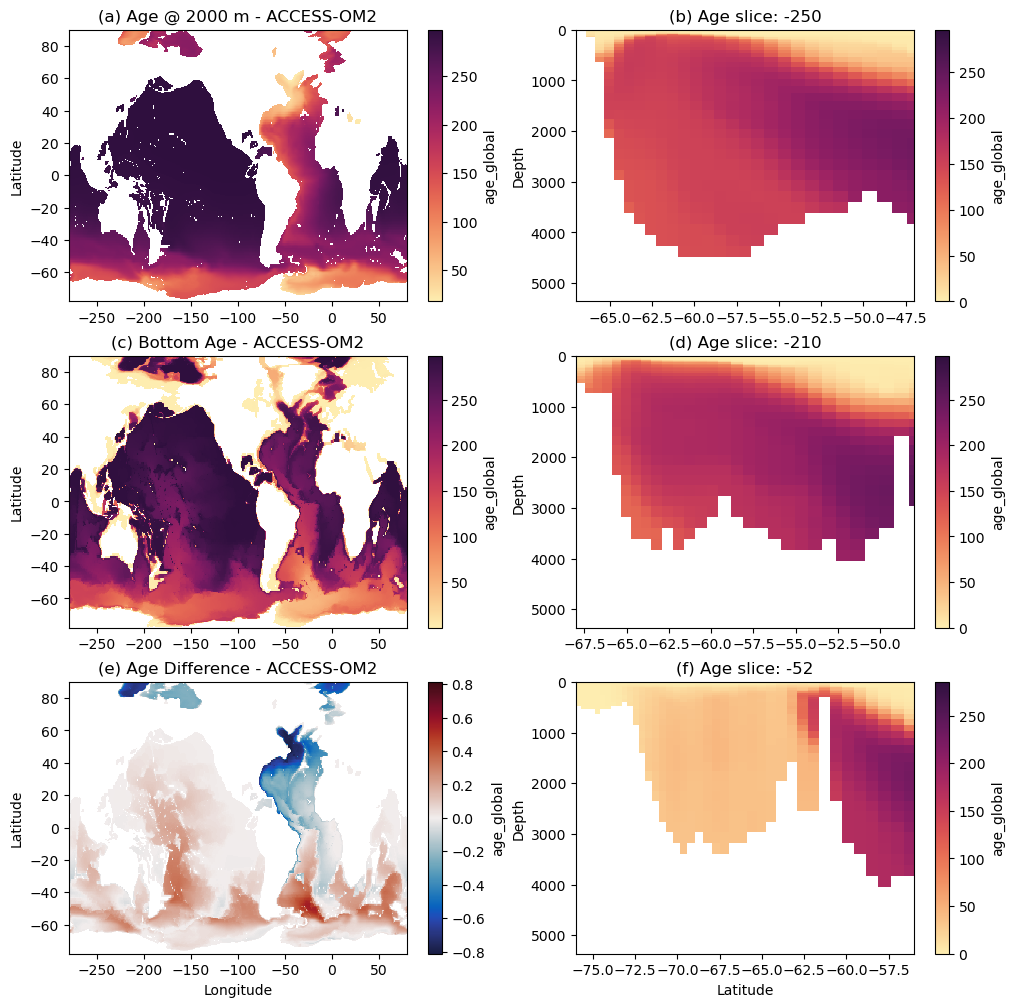

In [8]:
plt.figure(figsize=(12,12))

plt.subplot(321)
age_slice_10.plot(cmap=cm.cm.matter)
plt.title('(a) Age @ 2000 m - ACCESS-OM2')
plt.xlabel('')
plt.ylabel('Latitude')

plt.subplot(323)
bottom_age_10.plot(cmap=cm.cm.matter)
plt.title('(c) Bottom Age - ACCESS-OM2')
plt.xlabel('')
plt.ylabel('Latitude')

plt.subplot(325)
age_diff_norm_10.plot(cmap=cm.cm.balance)
plt.title('(e) Age Difference - ACCESS-OM2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(322)
age_sect_10_A.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-67, -47])
plt.xlabel('')
plt.ylabel('Depth')
plt.title('(b) Age slice: -250')

plt.subplot(324)
age_sect_10_B.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-68, -48])
plt.xlabel('')
plt.ylabel('Depth')
plt.title('(d) Age slice: -210')

plt.subplot(326)
age_sect_10_C.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-76, -56])
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('(f) Age slice: -52')

savefigure('age_10')

In [9]:
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

darray = cc.querying.getvar(session=session, expt=expt, variable='age_global', chunks={'st_ocean': None}, n=-10)
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
age_025 = darray.sel(time=slice(pd.Timestamp(2014,1,1),pd.Timestamp(2017,12,31)))\
                        .mean('time').load()

In [10]:
darray = cc.querying.getvar(session=session, expt=expt, variable='kmt', n=-1)
kmt_025 = darray.fillna(1.0).astype(int) - 1
kmt_025.load()

<xarray.DataArray 'kmt' (yt_ocean: 1080, xt_ocean: 1440)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan

In [11]:
bottom_age_025 = age_025[kmt_025]
age_slice_025 = age_025.sel(st_ocean=2000,method='nearest')
age_diff_norm_025 = (age_slice_025-bottom_age_025)/300
age_sect_025_A = age_025.sel(xt_ocean=-250,method='nearest')
age_sect_025_B = age_025.sel(xt_ocean=-210,method='nearest')
age_sect_025_C = age_025.sel(xt_ocean=-52,method='nearest')

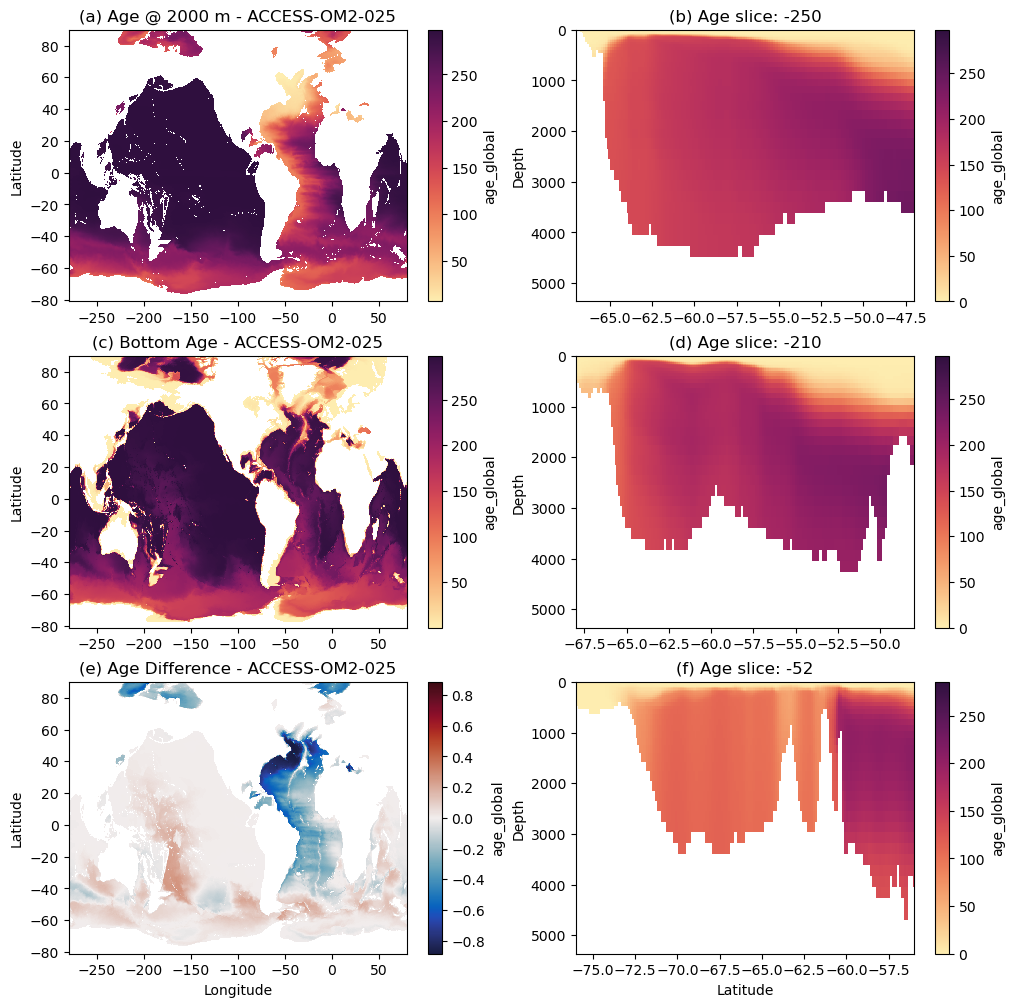

In [12]:
plt.figure(figsize=(12,12))

plt.subplot(321)
age_slice_025.plot(cmap=cm.cm.matter)
plt.title('(a) Age @ 2000 m - ACCESS-OM2-025')
plt.xlabel('')
plt.ylabel('Latitude')

plt.subplot(323)
bottom_age_025.plot(cmap=cm.cm.matter)
plt.title('(c) Bottom Age - ACCESS-OM2-025')
plt.xlabel('')
plt.ylabel('Latitude')

plt.subplot(325)
age_diff_norm_025.plot(cmap=cm.cm.balance)
plt.title('(e) Age Difference - ACCESS-OM2-025')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(322)
age_sect_025_A.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-67, -47])
plt.xlabel('')
plt.ylabel('Depth')
plt.title('(b) Age slice: -250')

plt.subplot(324)
age_sect_025_B.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-68, -48])
plt.xlabel('')
plt.ylabel('Depth')
plt.title('(d) Age slice: -210')

plt.subplot(326)
age_sect_025_C.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-76, -56])
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('(f) Age slice: -52')

savefigure('age_025')

In [13]:
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

darray = cc.querying.getvar(session=session, expt=expt, variable='age_global', chunks={'st_ocean': None}, n=-24)
if offset:
    td = pd.Timedelta(days=offset)
    darray = darray.assign_coords(time=darray.time + td)
age_01 = darray.sel(time=slice(pd.Timestamp(2014,1,1),pd.Timestamp(2017,12,31)))\
                        .mean('time').load()

In [14]:
darray = cc.querying.getvar(session=session, expt=expt, variable='kmt', n=-1)
kmt_01 = darray.fillna(1.0).astype(int) - 1
kmt_01.load()

<xarray.DataArray 'kmt' (yt_ocean: 2700, xt_ocean: 3600)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan

In [15]:
bottom_age_01 = age_01[kmt_01]
age_slice_01 = age_01.sel(st_ocean=2000,method='nearest')
age_diff_norm_01 = (age_slice_01-bottom_age_01)/70
age_sect_01_A = age_01.sel(xt_ocean=-250,method='nearest')
age_sect_01_B = age_01.sel(xt_ocean=-210,method='nearest')
age_sect_01_C = age_01.sel(xt_ocean=-52,method='nearest')

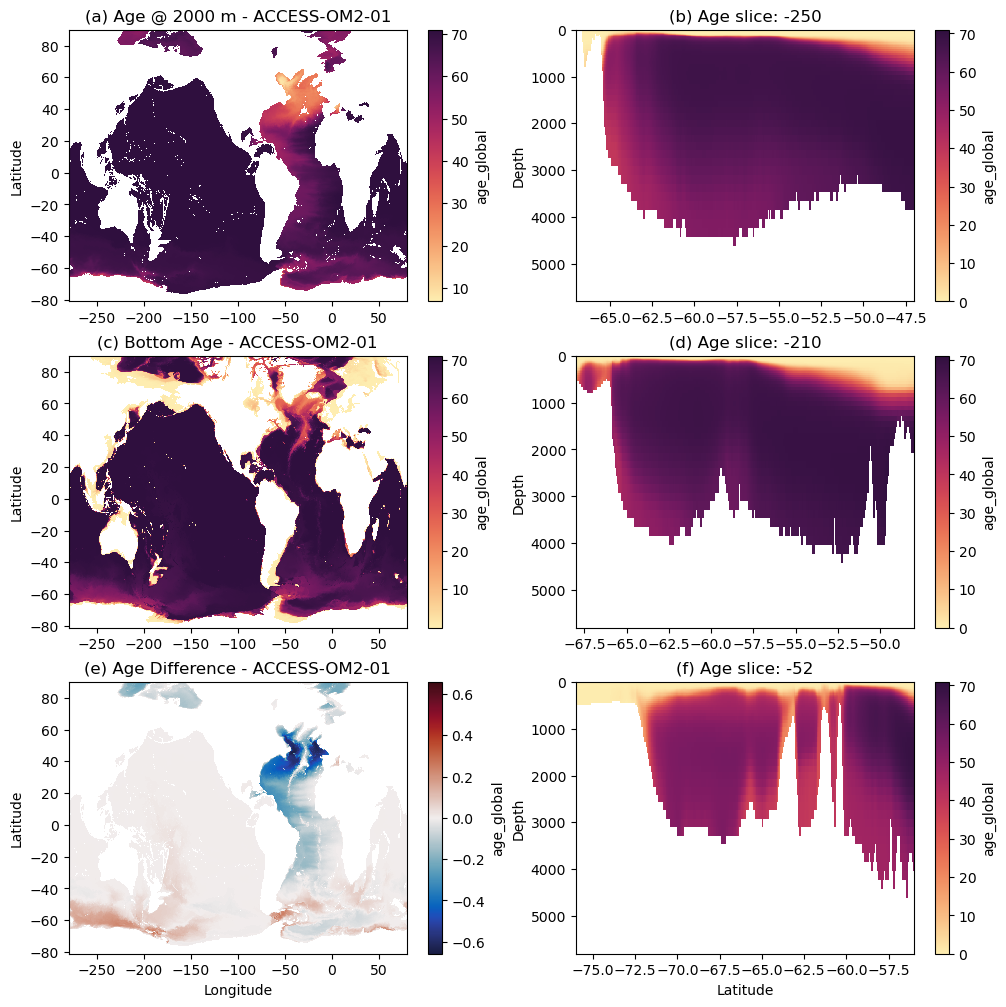

In [16]:
plt.figure(figsize=(12,12))

plt.subplot(321)
age_slice_01.plot(cmap=cm.cm.matter)
plt.title('(a) Age @ 2000 m - ACCESS-OM2-01')
plt.xlabel('')
plt.ylabel('Latitude')

plt.subplot(323)
bottom_age_01.plot(cmap=cm.cm.matter)
plt.title('(c) Bottom Age - ACCESS-OM2-01')
plt.xlabel('')
plt.ylabel('Latitude')

plt.subplot(325)
age_diff_norm_01.plot(cmap=cm.cm.balance)
plt.title('(e) Age Difference - ACCESS-OM2-01')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(322)
age_sect_01_A.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-67, -47])
plt.xlabel('')
plt.ylabel('Depth')
plt.title('(b) Age slice: -250')

plt.subplot(324)
age_sect_01_B.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-68, -48])
plt.xlabel('')
plt.ylabel('Depth')
plt.title('(d) Age slice: -210')

plt.subplot(326)
age_sect_01_C.plot(cmap=cm.cm.matter)
plt.gca().invert_yaxis()
plt.xlim([-76, -56])
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('(f) Age slice: -52')

savefigure('age_01')